In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [16]:
np.random.seed(1)
n = 50

X1 = np.random.uniform(10, 100, n)
X2 = X1 + np.random.normal(0, 2, n)
X3 = np.random.uniform(5, 50, n)
X4 = X3 + np.random.normal(0, 1, n)
df = pd.DataFrame({
    "Feature 1": X1,
    "Feature 2": X2,
    "Feature 3": X3,
    "Feature 4": X4
})

df.head()

,Feature 1,Feature 2,Feature 3,Feature 4
0,47.531980,46.157635,46.966796,48.088214
1,74.829204,73.138793,36.356817,36.765718
2,10.010294,8.667801,7.970008,7.945391
3,37.209932,37.184602,38.995837,38.220676
4,23.208030,20.973409,38.924428,40.198184


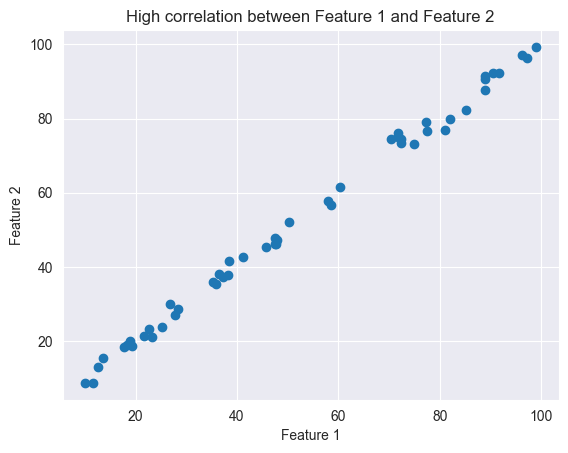

In [17]:
plt.figure()
plt.scatter(df["Feature 1"], df["Feature 2"])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("High correlation between Feature 1 and Feature 2")
plt.show()

In [21]:
X = df.copy()
X_const = add_constant(X)

vif_df = pd.DataFrame({
    "Feature": X.columns,
    "VIF": [
        variance_inflation_factor(X_const.values, i+1)
        for i in range(X.shape[1])
    ]
})
display(vif_df)


,Feature,VIF
0,Feature 1,241.616417
1,Feature 2,241.279932
2,Feature 3,271.379644
3,Feature 4,271.821566


In [22]:
# Selecting Feature 1 and Feature 3
X_reduced = df[["Feature 1", "Feature 3"]]
X_reduced_const = add_constant(X_reduced)

# Calculating VIF for the reduced features
vif_reduced_df = pd.DataFrame({
    "Feature": X_reduced.columns,
    "VIF": [
        variance_inflation_factor(X_reduced_const.values, i+1)
        for i in range(X_reduced.shape[1])
    ]
})
display(vif_reduced_df)


,Feature,VIF
0,Feature 1,1.013398
1,Feature 3,1.013398


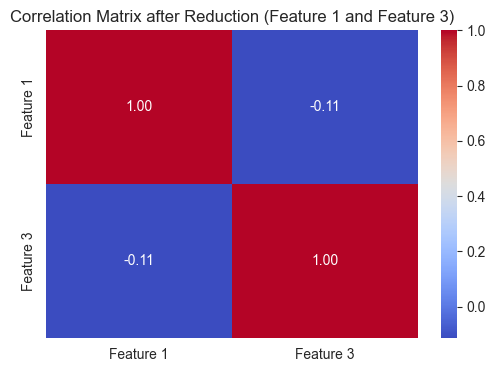

In [23]:
import seaborn as sns
# Plotting Correlation Matrix after reduction
corr_matrix = X_reduced.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix after Reduction (Feature 1 and Feature 3)")
plt.show()